In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("pl-tables-1996-2024.csv")

In [3]:
print(df.shape)
df.head()

(580, 12)


,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
1,1996,Newcastle Utd,2,38,24,6,8,66,37,29,78,→ UEFA Cup via league finish
2,1996,Liverpool,3,38,20,11,7,70,34,36,71,→ UEFA Cup Winners' Cup via cup win 1
3,1996,Aston Villa,4,38,18,9,11,52,35,17,63,→ UEFA Cup via league finish
4,1996,Arsenal,5,38,17,12,9,49,32,17,63,→ UEFA Cup via league finish 2


In [4]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  580 non-null    int64 
 1   team             580 non-null    object
 2   position         580 non-null    int64 
 3   played           580 non-null    int64 
 4   won              580 non-null    int64 
 5   drawn            580 non-null    int64 
 6   lost             580 non-null    int64 
 7   gf               580 non-null    int64 
 8   ga               580 non-null    int64 
 9   gd               580 non-null    int64 
 10  points           580 non-null    int64 
 11  notes            300 non-null    object
dtypes: int64(10), object(2)
memory usage: 54.5+ KB


,season_end_year,position,played,won,drawn,lost,gf,ga,gd,points
count,580.000000,580.000000,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,2010.000000,10.500000,38.0,14.218966,9.562069,14.218966,51.217241,51.217241,0.000000,52.177586
std,8.373822,5.771259,0.0,5.825498,2.843884,5.472682,15.537943,12.990406,25.421898,16.696866
min,1996.000000,1.000000,38.0,1.000000,2.000000,0.000000,20.000000,15.000000,-69.000000,11.000000
25%,2003.000000,5.750000,38.0,10.000000,7.000000,10.000000,40.000000,43.000000,-17.000000,41.000000
50%,2010.000000,10.500000,38.0,13.000000,9.000000,15.000000,48.000000,51.000000,-5.500000,49.000000
75%,2017.000000,15.250000,38.0,18.000000,11.000000,18.000000,59.250000,59.000000,15.000000,63.000000
max,2024.000000,20.000000,38.0,32.000000,17.000000,29.000000,106.000000,104.000000,79.000000,100.000000


In [6]:
#is_champion will be the "y"
df['is_champion'] = (df['position'] == 1).astype(int)

In [7]:
#removing positions and points because they directly give us the answer. This will result in data leakage as the model will end up memorizing it instead of learning anything.
columns_to_drop = ['position', 'points', 'notes']
df = df.drop(columns=columns_to_drop)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') # for col names
print(df.isnull().sum())


season_end_year    0
team               0
played             0
won                0
drawn              0
lost               0
gf                 0
ga                 0
gd                 0
is_champion        0
dtype: int64


In [10]:
print(df.shape)

(580, 10)


In [11]:
df = df.dropna(subset=['team', 'played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd']) #if these critical cols have null values then I am removing them


In [12]:
print(df.shape)

(580, 10)


In [13]:
df = df.drop_duplicates()

In [14]:
print(df.shape)

(580, 10)


In [15]:
#ensuring that numeric cols are numericall olny
numeric_cols = ['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [16]:
df.head()

,season_end_year,team,played,won,drawn,lost,gf,ga,gd,is_champion
0,1996,Manchester Utd,38,25,7,6,73,35,38,1
1,1996,Newcastle Utd,38,24,6,8,66,37,29,0
2,1996,Liverpool,38,20,11,7,70,34,36,0
3,1996,Aston Villa,38,18,9,11,52,35,17,0
4,1996,Arsenal,38,17,12,9,49,32,17,0


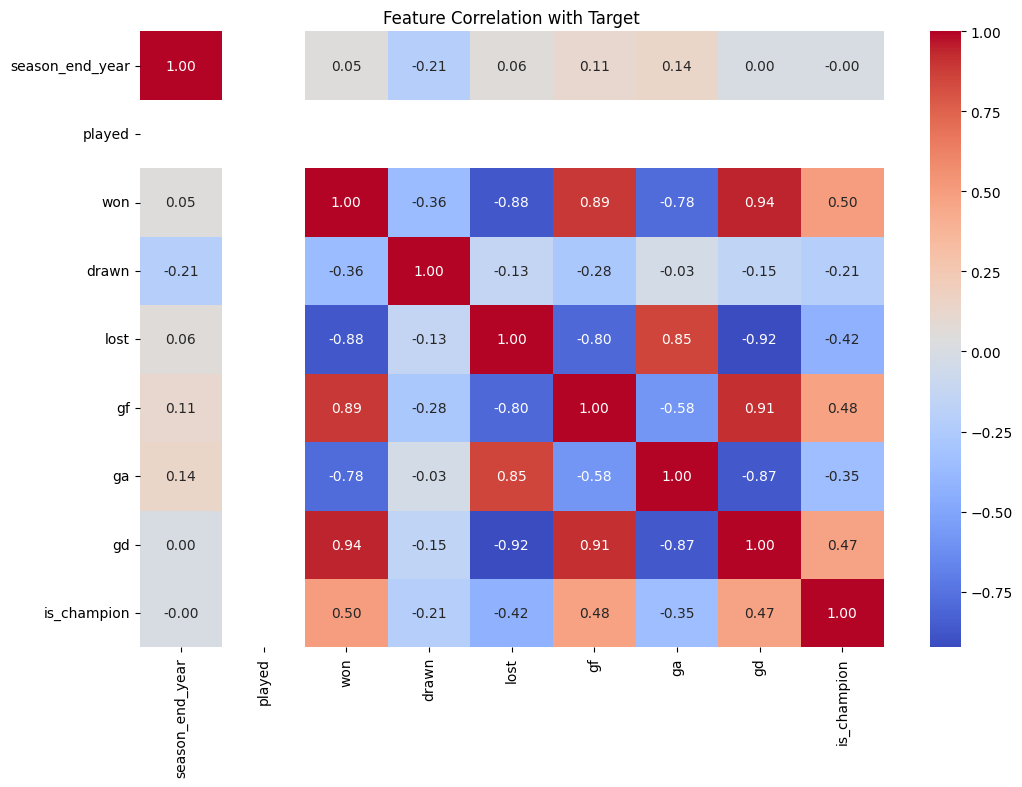

In [20]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist() #list of cols
numeric_features.remove('is_champion')
corr_matrix = df[numeric_features + ['is_champion']].corr() #makes matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Target")
plt.show()
#played is giving blank because it is connstant (38) for the data between 1996 to 2024 (I removed the data from 1993-95) as they had 42 matches. This wouldve created a bias